<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION MINI PROJECT </h1>
     


In [40]:
! pip install mlxtend

In [1]:
# Import Numeric Python
import numpy as np

# Import Pandas 
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Filter Warning
from warnings import filterwarnings
filterwarnings('ignore')

# DATA PREPROCESSING
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# TRAIN TEST SPLIT 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# REGULAIZATION TECHNIQUES
from sklearn.linear_model import Ridge

In [41]:
# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

<h2 class="list-group-item list-group-item-action active" >1. Read the dataset likes.csv </h2>

In [2]:
df = pd.read_csv('likes.csv')
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


##### NUMBER OF ROWS AND COLUMNS IN THE DATA

In [3]:
# Number of Rows
row = df.shape[0]
# Number of Columns
col = df.shape[1]

# PRINTING ROWS AND COLUMNS
print(f"Number of Rows in the data set : {row}\nNumber of Columns in the Data Set : {col}")

Number of Rows in the data set : 2104
Number of Columns in the Data Set : 15


##### NUMBER OF UNIQUE USER

In [4]:
no_user = df['userid'].unique()
print(f'Number of Unique user : {len(no_user)}')

Number of Unique user : 2104


##### FIVE POINT SUMMARY OF THE NUMERIC DATA 

In [5]:
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,2.104000e+03,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000
mean,1.591984e+06,33.427281,13.144962,1979.572719,5.882605,274.701046,2.039924,1.453422,27.654468,7.934886,17.676331,4.091255,9.978137,3.843631
std,3.444627e+05,16.155287,9.242513,16.155287,3.698839,297.508563,1.397070,1.242272,169.454213,44.784909,155.249561,25.828290,53.746481,22.127323
min,1.000738e+06,13.000000,1.000000,1905.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.295331e+06,22.000000,4.750000,1971.750000,2.000000,54.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.584463e+06,28.000000,12.500000,1985.000000,6.000000,191.000000,2.000000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.883310e+06,41.250000,21.000000,1991.000000,9.000000,387.000000,3.000000,2.000000,14.000000,3.000000,6.000000,2.000000,3.000000,1.000000
max,2.193411e+06,108.000000,31.000000,2000.000000,12.000000,2303.000000,5.000000,5.000000,5937.000000,1326.000000,5704.000000,679.000000,1580.000000,647.000000


##### NULL VALUE ANALYSIS

In [6]:
# To Check Percentage Null Value in Each Columns
df.isnull().sum()/len(df)*100

userid                   0.000000
age                      0.000000
dob_day                  0.000000
dob_year                 0.000000
dob_month                0.000000
gender                   0.095057
tenure                   0.000000
friend_count             0.000000
friendships_initiated    0.000000
likes                    0.000000
likes_received           0.000000
mobile_likes             0.000000
mobile_likes_received    0.000000
www_likes                0.000000
www_likes_received       0.000000
dtype: float64

INTERPRETATION : GENDER COLUMNS HAS VERY FEW NULL VALUE WHICH WE HAVE TO FIX IT

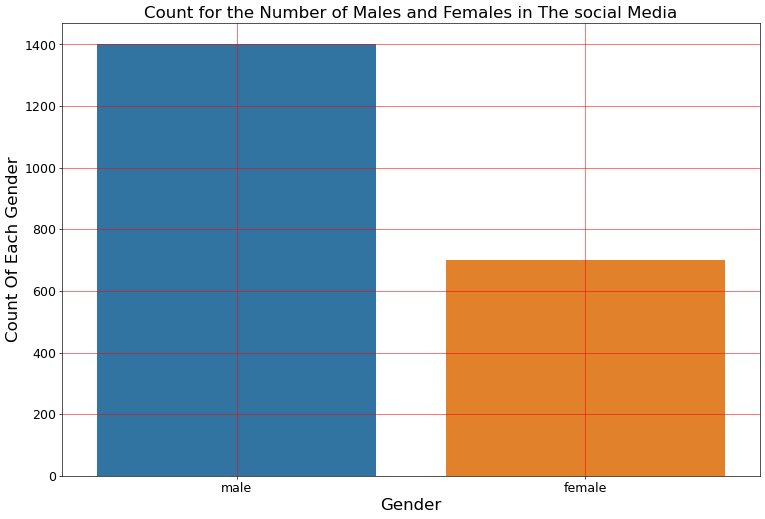

In [7]:
# As Gender is Categorical Columns we need to fill the value which has the highest counts

# Plotting Bar Graph Or Count to Check the Count of Each Categorical Columns

# Figure Size
plt.figure(figsize = (15,10) ,dpi = 60)

# PLotting The Count Plot Using Seaborn
sns.countplot(data=df , x = df['gender'])

# Title of the plot
plt.title('Count for the Number of Males and Females in The social Media',size = 20)

# ADDING TEXT ABOVE THE BAR

# X AXIS
plt.xticks(size = 15)
plt.xlabel('Gender',size = 20)

# Y AXIS
plt.yticks(size = 15)
plt.ylabel('Count Of Each Gender',size = 20)

# Showing Plot and Grid in the Plot
plt.grid(True ,  alpha = 0.8, color = 'red')
plt.show()

INTERPRETATION : WHERE EVERY THERE IS NULL VALUE IN THE GENDER COLUMN WE SHOULD ADD MALE GENDER

In [8]:
df['gender'].fillna('male',inplace =True)

In [9]:
# Now Checking Null Value

# To Check Percentage Null Value in Each Columns
df.isnull().sum()/len(df)*100

userid                   0.0
age                      0.0
dob_day                  0.0
dob_year                 0.0
dob_month                0.0
gender                   0.0
tenure                   0.0
friend_count             0.0
friendships_initiated    0.0
likes                    0.0
likes_received           0.0
mobile_likes             0.0
mobile_likes_received    0.0
www_likes                0.0
www_likes_received       0.0
dtype: float64

INTERPREATION : HENCE WE HAVE NO NULL VALUE WE CAN PROCCED TO THE EXPLORATORY DATA ANALYSIS

##### DATA TYPE OF EACH COLUMNS

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   userid                 2104 non-null   int64 
 1   age                    2104 non-null   int64 
 2   dob_day                2104 non-null   int64 
 3   dob_year               2104 non-null   int64 
 4   dob_month              2104 non-null   int64 
 5   gender                 2104 non-null   object
 6   tenure                 2104 non-null   int64 
 7   friend_count           2104 non-null   int64 
 8   friendships_initiated  2104 non-null   int64 
 9   likes                  2104 non-null   int64 
 10  likes_received         2104 non-null   int64 
 11  mobile_likes           2104 non-null   int64 
 12  mobile_likes_received  2104 non-null   int64 
 13  www_likes              2104 non-null   int64 
 14  www_likes_received     2104 non-null   int64 
dtypes: int64(14), object(

Interpretation : We have one categorical columns that is gender

<h2 class="list-group-item list-group-item-action active" >2. Basic EDA to understand dataset </h2>

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 
             
 Step2: Write the inference is it data skewed or not

 Step3: Write the inference is it data having  outliers  or not



>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

##### SEPARATE CONTINOUS AND CATEGORICAL COLUMNS

In [10]:
df_num = df.select_dtypes('number')
df_cat = df.select_dtypes('object')

In [11]:
df_num.shape[1]

14

#### 1. SUBPLOTS

NUMERIC COLUMNS 

A. KERNEL DISTRIBUTION PLOT -- > TO SEE DISTRIBUTION OF PLOT

B. BOXPLOT -- > TO CHECK FOR OUTLIER 

CATEGORICAL COLUMNS

A. COUNT PLOT

###### NUMERIC COLUMNS 

A. KERNEL DISTRIBUTION PLOT -- > TO SEE DISTRIBUTION OF PLOT

B. BOXPLOT -- > TO CHECK FOR OUTLIER 

In [ ]:
# plotting scatter plot with for loop and subplots
fig,ax = plt.subplots(nrows= 2 ,ncols= 5, figsize = (20,10))
for variable,subplot in zip(x.columns[0:],ax.flatten()):
    z = sns.scatterplot(x[variable],res,ax = subplot)
    z.set_ylabel('Residual',fontsize = 10)

In [ ]:
fig,ax = plt.subplots(nrows=28,ncols=2,figsize = (15,10))
for variable in df.num.columns : 
    

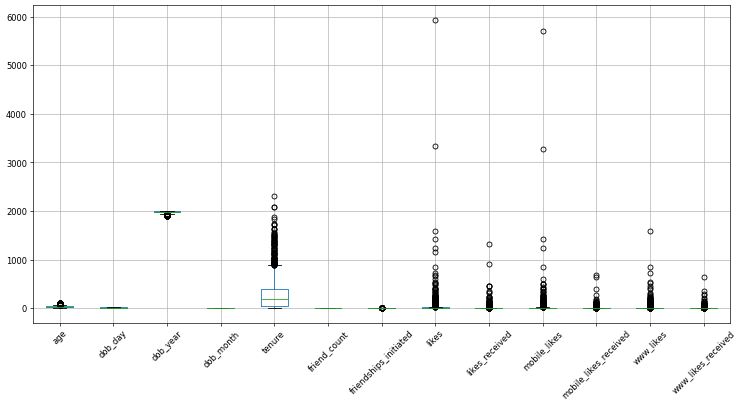

In [30]:
plt.figure(figsize = (15,7),dpi = 60)
df.drop('userid',axis=1).boxplot()
plt.xticks(rotation = 45)
plt.show()

###### CATEGORICAL COLUMNS

A. COUNT PLOT

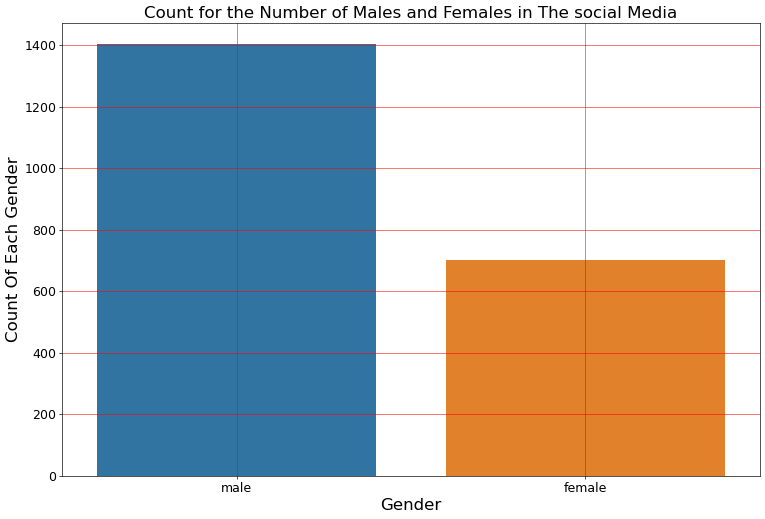

In [12]:
# Figure Size
plt.figure(figsize = (15,10) ,dpi = 60)

# PLotting The Count Plot Using Seaborn
sns.countplot(data=df , x = df['gender'])

# Title of the plot
plt.title('Count for the Number of Males and Females in The social Media',size = 20)

# ADDING TEXT ABOVE THE BAR

# X AXIS
plt.xticks(size = 15)
plt.xlabel('Gender',size = 20)

# Y AXIS
plt.yticks(size = 15)
plt.ylabel('Count Of Each Gender',size = 20)

# Showing Plot and Grid in the Plot
plt.grid(True ,  alpha = 0.8, color = 'red')
plt.show()

##### 2. HEAT MAP

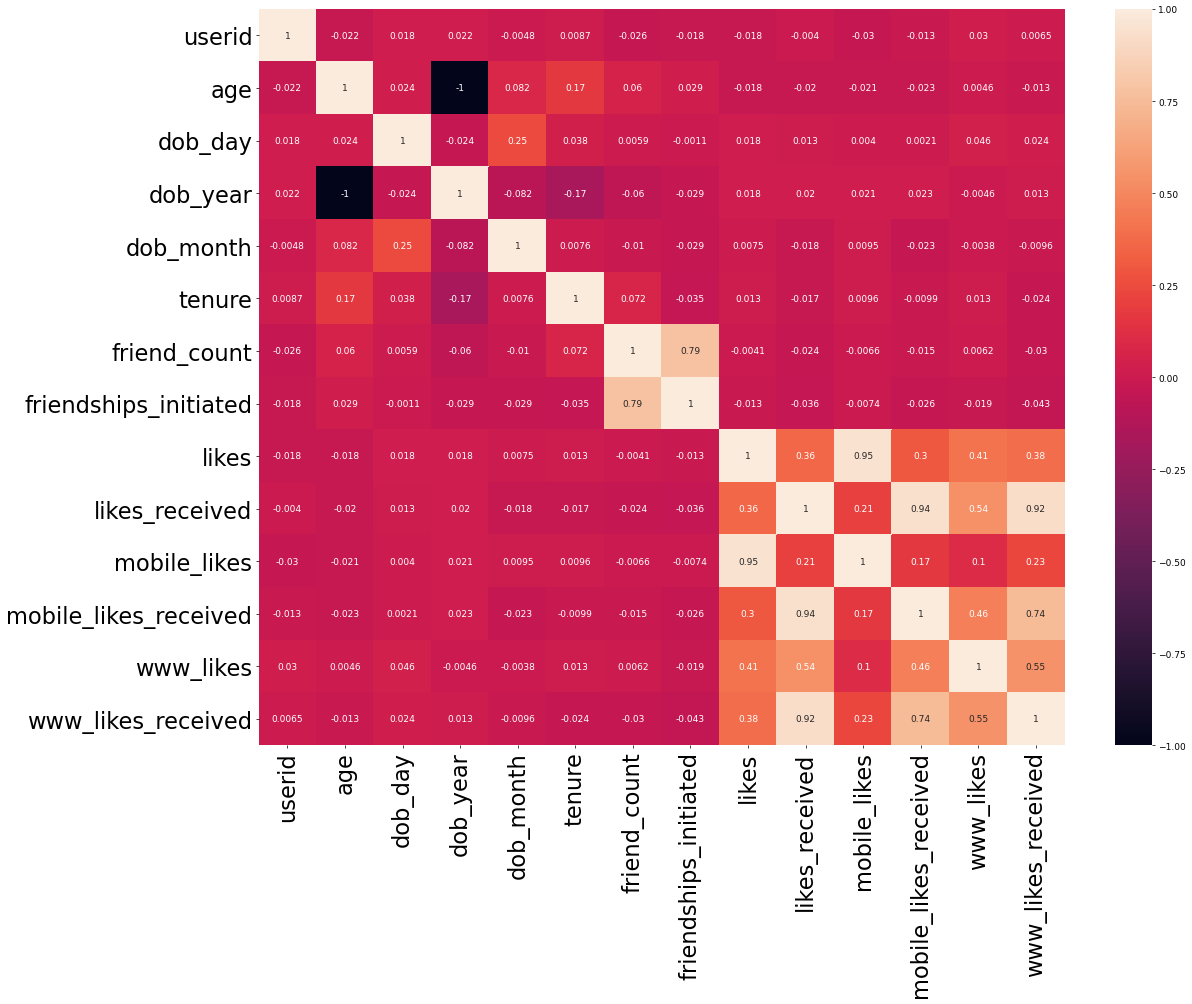

In [13]:
# FIGURE SIZE 
plt.figure(figsize=(20,15), dpi = 65)
sns.heatmap(df.corr(),annot=True)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.show()

INTERPRETATION : DEPENDENT VARIABLE (LIKES) IS CORRELATED TO 
    
    1. LIKES_RECEIVED 
    2. MOBILE_LIKES
    3. MOBIL_LIKES_RECEIVED
    4. WWW_LIKES
    5. WWW_LIKES_RECEIVED

In [53]:
x = df[['mobile_likes','mobile_likes_received','www_likes','www_likes_received']]
y = df['likes']

<h2 class="list-group-item list-group-item-action active" >3.Split dataset into train and test,Scaling    </h2>

>### 1. Split the dataset in dependent variable is [`likes`] and independent

>### 2. Convert categorical variables to numeric variables

>### 3. Scale the features 

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 
 

Independent Variable -- > X

Dependent Variable  -- > Y

##### SPLITING THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLE

In [31]:
Y = df['likes']
X = df.drop(['likes','userid'],axis = 1)

##### LABEL ENCODING 

WE HAVE ONE CATEGORICAL COLUMN -- > GENDER hence we can do label encoding on it

In [32]:
LE = LabelEncoder()
X['gender'] = LE.fit_transform(df['gender'])
X.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13,2,2000,2,1,0,0,0,0,0,0,1,0
1,14,22,1999,1,1,104,0,0,0,0,0,1,0
2,19,18,1994,10,0,212,0,0,0,0,0,1,0
3,21,1,1992,1,1,328,0,0,0,0,0,1,0
4,23,10,1990,2,1,580,0,0,0,0,0,1,0


1 -- > MALE

2 -- > FEMALE

##### STANDARD SCALING FEATURED DATA

In [35]:
SS = StandardScaler()
data = SS.fit_transform(X)
scaled_data = pd.DataFrame(data,columns=X.columns)
scaled_data.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,-1.264734,-1.206123,1.264734,-1.049932,0.707611,-0.923558,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746
1,-1.202820,0.958305,1.202820,-1.320351,0.707611,-0.573905,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746
2,-0.893250,0.525419,0.893250,1.113424,-1.413206,-0.210804,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746
3,-0.769422,-1.314345,0.769422,-1.320351,0.707611,0.179194,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746
4,-0.645594,-0.340352,0.645594,-1.049932,0.707611,1.026429,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746


##### SPLITING THE DATA

In [36]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data,Y,test_size=0.3,random_state=10)

In [37]:
print('Train Data Shape : ',x_train.shape)
print('Test Data Shape : ',x_test.shape)

Train Data Shape :  (1472, 13)
Test Data Shape :  (632, 13)


<h2 class="list-group-item list-group-item-action active" >4.Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

>### 1. Use Linear Regression

>### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

>### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.    




>### 4. Model Bulding with optimal features count



In [39]:
linreg = LinearRegression()

In [ ]:
from sklearn.linear_model import 

In [44]:
rfe_model = RFE(estimator=linreg, n_features_to_select = 5)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(x_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = x_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['dob_day', 'gender', 'mobile_likes', 'mobile_likes_received',
       'www_likes'],
      dtype='object')


In [48]:
use_data = scaled_data[['dob_day', 'gender', 'mobile_likes', 'mobile_likes_received','www_likes']]
x_train,x_test,y_train,y_test = train_test_split(use_data,Y,test_size=0.3,random_state=10)

# ADDING CONSTANT TO THE TRAIN AND TEST
x_train_constant = sm.add_constant(x_train)
x_test_constant = sm.add_constant(x_test)

# ORDINARY LEAST SQUARED METHOD
ols_model  = sm.OLS(y_train,x_train_constant).fit()

# Model Summary
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.449e+31
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:45:26   Log-Likelihood:                 40385.
No. Observations:                1472   AIC:                        -8.076e+04
Df Residuals:                    1466   BIC:                        -8.073e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    27.6545    7.7e-15   3.59e+15      0.000      27.654      27.654
dob_day               -1.624e-14   7.66e-15     -2.120      0.034   -3.13e-14   -1.21e-15
gender                 3.442e-14   7.77e-15      4.427      0.000    1.92e-14    4.97e-14
mobile_likes            155.2127   7.88e-15   1.97e+16      0.000     155.213     155.213
mobile_likes_received -7.327e-14   1.03e-14     -7.128      0.000   -9.34e-14   -5.31e-14
www_likes                53.7337    1.2e-14   4.47e+15      0.000      53.734      53.734
==============================================================================
Omnibus:                     3777.181   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51130384.608
Skew:                          27.535   Prob(JB):                         0.00
Kurtosis:                     914.381   Cond. No.                         1.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### R SQUARE AND ADJUSTED R SQUARE VALUE

In [51]:
rsquare_value_ols = ols_model.rsquared
adjrsqaure_value_ols = ols_model.rsquared_adj

print('R Square value of the Ordinary Least Sqaure Method : ',rsquare_value_ols)
print('Adjusted R Square Value : ',adjusted_value_ols)

R Square value of the Ordinary Least Sqaure Method :  1.0
Adjusted R Square Value :  1.0


##### RMSE VALUE AND MAPE VALUE

In [53]:
train_predict = ols_model.predict(x_train_constant)
test_predict  = ols_model.predict(x_test_constant)

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [61]:
train_value_rmse = mean_squared_error(y_train,train_predict)
print('Rmse value of the mean squared error train : ',round(train_value_rmse,4))
test_value_rmse = mean_squared_error(y_test,test_predict)
print('Rmse value of the mean squared error test : ',round(test_value_rmse,4))

Rmse value of the mean squared error train :  0.0
Rmse value of the mean squared error test :  0.0


HENCE MODEL IS IDEAL MODEL HENCE GOOD FIT MODEL

<h2 class="list-group-item list-group-item-action active" >5.Linear Regression Assumptions Validation</h2>


>### 1. Linearity of the model
>### 2. Normality of residuals 

##### NORMALITY OF RESIDUALS

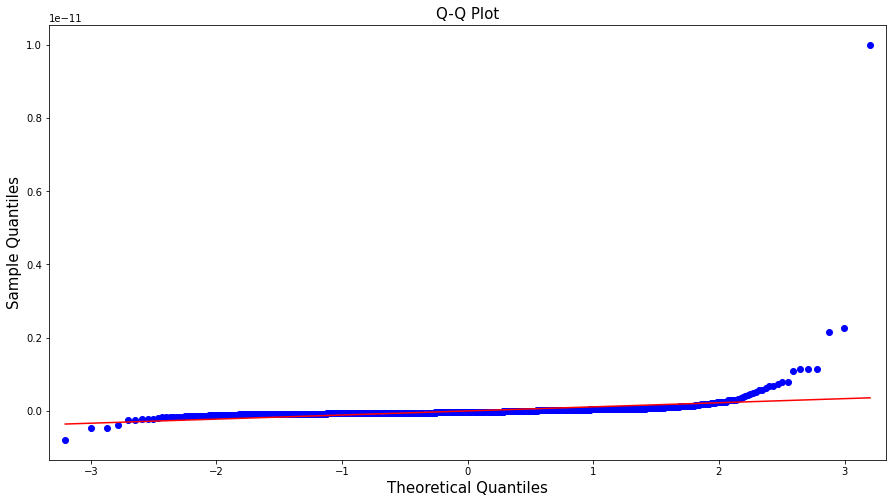

In [65]:
plt.rcParams['figure.figsize'] = [15,8]
qqplot(ols_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

<h2 class="list-group-item list-group-item-action active" >6.Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>


>### A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

>### B. K-Fold Cross Validation